#COVID-19


---



---

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.  

The following list describes each of the dataset’s features used by the model:


A. Basic information:

1. ID (Individual ID)

2. Sex (male/female).

3. Age ≥60 above years (true/false)

4. Test date (date when tested for COVID)


B. Symptoms:

5. Cough (true/false).

6. Fever (true/false).

7. Sore throat (true/false).

8. Shortness of breath (true/false).

9. Headache (true/false).


C. Other information:

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative



In [ ]:
# Importing required libraries for data maniplation

import pandas as pd
import numpy as np

# Importing required libraries for data Visualzation

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
Data = pd.read_csv("/content/corona_tested_006.csv")

In [ ]:
Data.head(10) # ------------- Checking datatypes and some other features of the first ten records in dataset dataset

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
5,6,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,other,None,None,Contact with confirmed
6,7,11-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Other
7,8,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,negative,None,None,Abroad
8,9,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
9,10,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57802 entries, 0 to 57801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               57802 non-null  int64 
 1   Test_date            57802 non-null  object
 2   Cough_symptoms       57802 non-null  object
 3   Fever                57802 non-null  object
 4   Sore_throat          57802 non-null  object
 5   Shortness_of_breath  57802 non-null  object
 6   Headache             57802 non-null  object
 7   Corona               57802 non-null  object
 8   Age_60_above         57802 non-null  object
 9   Sex                  57802 non-null  object
 10  Known_contact        57802 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.9+ MB


In [ ]:
print("Age_60_above",Data['Age_60_above'].unique())
print("Sex",Data['Sex'].unique())
print("Known_contact",Data['Known_contact'].unique())
print("Corona",Data['Corona'].unique())
print("Cough_symptoms",Data['Cough_symptoms'].unique())

Age_60_above ['None' 'No' 'Yes']
Sex ['None' 'male' 'female']
Known_contact ['Abroad' 'Contact with confirmed' 'Other' 'Othe']
Corona ['negative' 'positive' 'other']
Cough_symptoms ['TRUE' 'FALSE' 'None']


In [ ]:
Data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

###DATA PREPROCESSING

In [ ]:
objects_data = pd.DataFrame(Data.dtypes =='object').reset_index()
object_type = objects_data[objects_data[0] == True]['index']
object_type

1               Test_date
2          Cough_symptoms
3                   Fever
4             Sore_throat
5     Shortness_of_breath
6                Headache
7                  Corona
8            Age_60_above
9                     Sex
10          Known_contact
Name: index, dtype: object

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57802 entries, 0 to 57801
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               57802 non-null  int64 
 1   Test_date            57802 non-null  object
 2   Cough_symptoms       57802 non-null  object
 3   Fever                57802 non-null  object
 4   Sore_throat          57802 non-null  object
 5   Shortness_of_breath  57802 non-null  object
 6   Headache             57802 non-null  object
 7   Corona               57802 non-null  object
 8   Age_60_above         57802 non-null  object
 9   Sex                  57802 non-null  object
 10  Known_contact        57802 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.9+ MB


###DATA VISUALIZATION

***Verifing that what symptoms(i.e features) are effecting Covid-19 mostly***

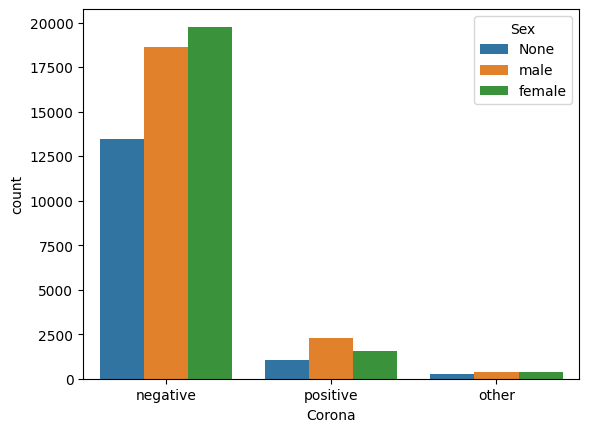

In [ ]:
sns.countplot(Data, hue = 'Sex', x = Data['Corona'])
sns.set(style='whitegrid')

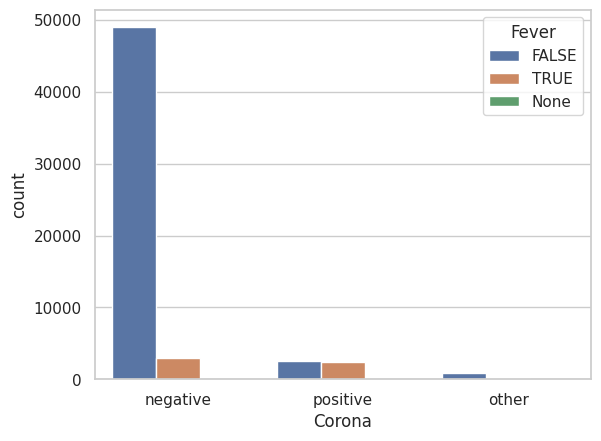

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Fever')
sns.set(style='whitegrid')

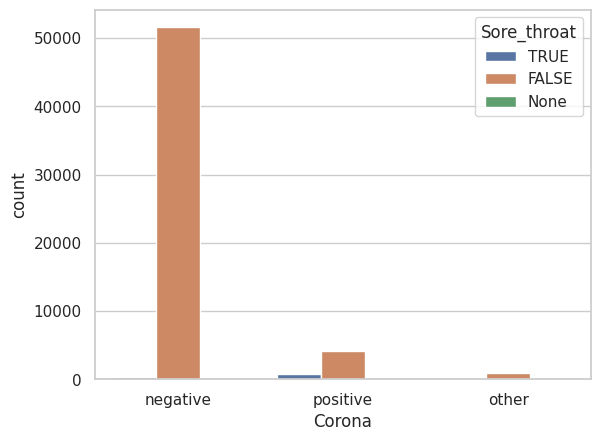

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Sore_throat')
sns.set(style='whitegrid')

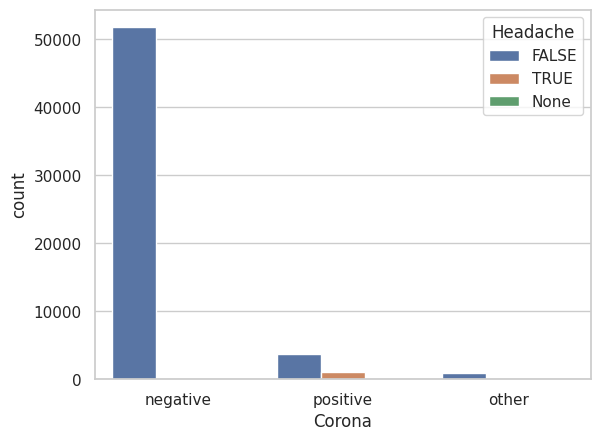

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Headache')
sns.set(style='whitegrid')

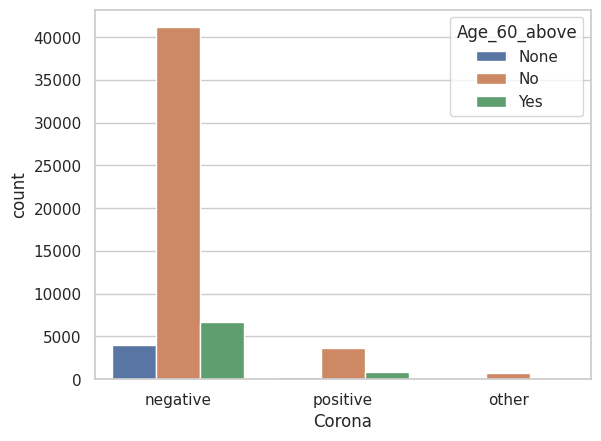

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Age_60_above')
sns.set(style='whitegrid')

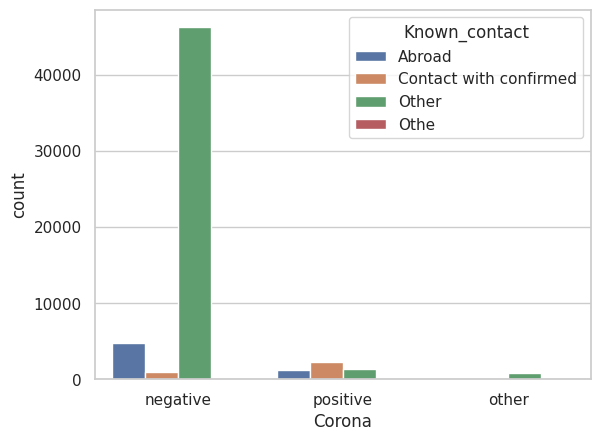

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Known_contact')
sns.set(style='whitegrid')

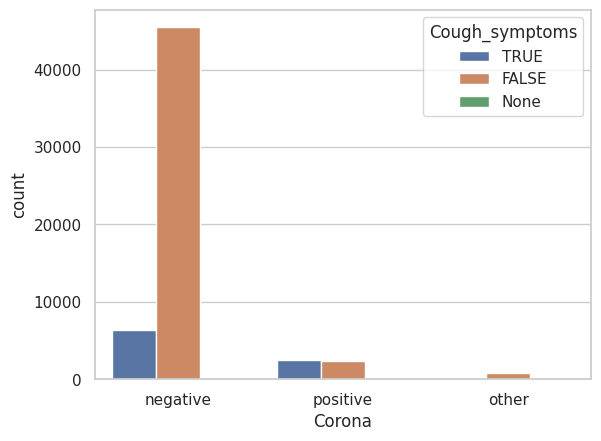

In [ ]:
sns.countplot(Data, x = Data['Corona'],hue='Cough_symptoms')
sns.set(style='whitegrid')

**conculsion:**
1. the number of people who got Covid test report as negitve is higher than the number of people who got Covid test report as positve
2. the sum of positively reported male people number is higher than female
3. The number of negtively reported people who got fever is lesser than the number of negtively reported people who did not get fever. And the people who got fever or not are postively reported for Covid-19 is almost equal in number. So that, fever is not considerable symptom actually in case of covid.
4. the number of positvely reported people who got sore_troat is very less as compared to  the number of positvely reported people who did not get sore_troat and the number of negtively reported people who did not sore_troat. So that, sore_troat is also not considerable symptom for Covid-19.
5. the reporting of symptom headache is similar to sore_troat,
6. the reporting of Age_60_above is similar to sore_troat
7. the one known_contact who got confirmed for positively reported people is heigher than other, so that feture known_contract with comformed persons is considerable
8. the number of postively reported people who has symptom cough or not is alomost equal and other hand the number of  negtively reported people who got cough is heigher than the number of positively reported people

----
Therefore, the positevly reported people with smytoms are less compared to the negtively reported people with symptoms.

these symptoms are not acceptable to predict Covid-19 except the ***Cough symptom ***


#FEATURE ENGINEERING

####FEATURE SELECTION AND TRANSFORMATION

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Define the custom mappings
custom_mappings = {
    'Cough_symptoms': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Fever': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Sore_throat': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Shortness_of_breath': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Headache': {'TRUE': 1, 'FALSE': 0, 'None': -1},
    'Corona': {'negative': 0, 'positive': 1, 'None': -1},
    'Age_60_above': {'None': -1, 'No': 0, 'Yes': 1},
    'Sex': {'None': -1, 'male': 1, 'female': 2},
    'Known_contact': {'Abroad': 1, 'Contact with confirmed': 2, 'Other': 3, 'None': -1}
}

# Apply label encoding with custom mappings
for column, mappings in custom_mappings.items():
    le = LabelEncoder()
    Data[column] = Data[column].map(mappings).fillna(-1)  # Using -1 as a placeholder for missing or unknown values in the label encoding process should not have a significant impact on data modeling, as long as you handle it appropriately in your modeling pipeline.

# Print the updated dataset
print(Data)





       Ind_ID   Test_date  Cough_symptoms  Fever  Sore_throat  \
0           1  11-03-2020               1      0            1   
1           2  11-03-2020               0      1            0   
2           3  11-03-2020               0      1            0   
3           4  11-03-2020               1      0            0   
4           5  11-03-2020               1      0            0   
...       ...         ...             ...    ...          ...   
57797   57798  30-03-2020               1      1            0   
57798   57799  30-03-2020               0      0            0   
57799   57800  30-03-2020               0      0            0   
57800   57801  30-03-2020               0      0            0   
57801   57802  30-03-2020               0      0            0   

       Shortness_of_breath  Headache  Corona  Age_60_above  Sex  Known_contact  
0                        0         0     0.0            -1   -1            1.0  
1                        0         0     1.0            -

In [ ]:
# Removing the index column
Data.reset_index(drop=True, inplace=True)

In [ ]:
Data = Data.drop(['Test_date'],axis=1)

In [ ]:
Data.head(5)

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,1,0,1,0,0,0.0,-1,-1,1.0
1,2,0,1,0,0,0,1.0,-1,-1,1.0
2,3,0,1,0,0,0,1.0,-1,-1,1.0
3,4,1,0,0,0,0,0.0,-1,-1,1.0
4,5,1,0,0,0,0,0.0,-1,-1,2.0


In [ ]:
# Calculate total count and percentage of each category for categorical features
categorical_features = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex', 'Known_contact']

for feature in categorical_features:
    feature_count = Data[feature].value_counts()
    total_count = len(Data)
    percentages = feature_count / total_count * 100

    print(f"\nCharacteristic of feature '{feature}':")
    print("-------------------------------")
    print("Category\tCount\tPercentage")
    print("-------------------------------")
    for category, count in feature_count.items():
        percentage = percentages[category]
        print(f"{category}\t{count}\t{percentage:.2f}%")



Characteristic of feature 'Cough_symptoms':
-------------------------------
Category	Count	Percentage
-------------------------------
0	48689	84.23%
1	9087	15.72%
-1	26	0.04%

Characteristic of feature 'Fever':
-------------------------------
Category	Count	Percentage
-------------------------------
0	52350	90.57%
1	5426	9.39%
-1	26	0.04%

Characteristic of feature 'Sore_throat':
-------------------------------
Category	Count	Percentage
-------------------------------
0	56736	98.16%
1	1065	1.84%
-1	1	0.00%

Characteristic of feature 'Shortness_of_breath':
-------------------------------
Category	Count	Percentage
-------------------------------
0	56779	98.23%
1	1022	1.77%
-1	1	0.00%

Characteristic of feature 'Headache':
-------------------------------
Category	Count	Percentage
-------------------------------
0	56561	97.85%
1	1240	2.15%
-1	1	0.00%

Characteristic of feature 'Corona':
-------------------------------
Category	Count	Percentage
-------------------------------
0.0	51884	89.

#MODEL SELECTION, TRAIN AND EVALUATION

In [ ]:
 from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X = Data.drop('Corona', axis=1)
y = Data['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Split the data into training and testing sets
X = Data.drop('Corona', axis=1)
y = Data['Corona']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Create a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Train and evaluate all the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")



Model: Random Forest
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: Logistic Regression
Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model: SVM
Accuracy: 0.90
Precision: 0.81
Recall: 0.90
F1 Score: 0.85

Model: K-Nearest Neighbors
Accuracy: 0.90
Precision: 0.86
Recall: 0.90
F1 Score: 0.87

Model: Naive Bayes
Accuracy: 0.89
Precision: 0.85
Recall: 0.89
F1 Score: 0.86

Model: Decision Tree
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------- Decision tree is best amoung all -----------------------------

Model: Decision Tree

Accuracy: 0.94

Precision: 0.94

Recall: 0.94

F1 Score: 0.94

# SQL QUIRIES

In [ ]:
import pymysql

# Connect to the MySQL database
connection = pymysql.connect(host='localhost',
                             user='username',
                             password='password',
                             db='database_name')

# Create a cursor object
cursor = connection.cursor()

# Find the number of corona patients who faced shortness of breath
query1 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Shortness of breath` = 1 AND `Corona report` = 'positive'"
cursor.execute(query1)
num_patients = cursor.fetchone()[0]
print("Number of corona patients who faced shortness of breath:", num_patients)

# Find the number of negative corona patients who have fever and sore throat
query2 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Fever` = 1 AND `Sore throat` = 1 AND `Corona report` = 'negative'"
cursor.execute(query2)
num_negative_patients = cursor.fetchone()[0]
print("Number of negative corona patients who have fever and sore throat:", num_negative_patients)

# Group the data by month and rank the number of positive cases
query3 = "SELECT MONTH(`Test date`) AS `Month`, COUNT(*) AS `Number of positive cases` FROM corona_tested_006 WHERE `Corona report` = 'positive' GROUP BY MONTH(`Test date`) ORDER BY COUNT(*) DESC"
cursor.execute(query3)
positive_cases_by_month = cursor.fetchall()
for row in positive_cases_by_month:
    print("Month:", row[0], "Number of positive cases:", row[1])

# Find the female negative corona patients who faced cough and headache
query4 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Sex` = 'female' AND `Cough` = 1 AND `Headache` = 1 AND `Corona report` = 'negative'"
cursor.execute(query4)
num_female_negative_patients = cursor.fetchone()[0]
print("Number of female negative corona patients who faced cough and headache:", num_female_negative_patients)

# How many elderly corona patients have faced breathing problems?
query5 = "SELECT COUNT(*) FROM corona_tested_006 WHERE `Age ≥60 above years` = 1 AND `Shortness of breath` = 1 AND `Corona report` = 'positive'"
cursor.execute(query5)
num_elderly_patients = cursor.fetchone()[0]
print("Number of elderly corona patients who faced breathing problems:", num_elderly_patients)

# Which three symptoms were more common among COVID positive patients?
query6 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'positive'"
cursor.execute(query6)
positive_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(positive_symptoms, reverse=True)
most_common_symptoms = sorted_symptoms[:3]
print("Three most common symptoms among COVID positive patients:", most_common_symptoms)

# Which symptom was less common among COVID negative people?
query7 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'negative'"
cursor.execute(query7)
negative_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(negative_symptoms)
least_common_symptom = sorted_symptoms[0]
print("Least common symptom among COVID negative people:", least_common_symptom)

# What are the most common symptoms among COVID positive males whose known contact was abroad?
query8 = "SELECT `Cough`, `Fever`, `Sore throat`, `Shortness of breath`, `Headache` FROM corona_tested_006 WHERE `Corona report` = 'positive' AND `Sex` = 'male' AND `Known contact with an individual confirmed to have COVID-19` = 1"
cursor.execute(query8)
male_abroad_symptoms = cursor.fetchall()[0]
sorted_symptoms = sorted(male_abroad_symptoms, reverse=True)
most_common_symptoms = sorted_symptoms[:3]
print("Three most common symptoms among COVID positive males whose known contact was abroad:", most_common_symptoms)

# Close the cursor and connection
cursor.close()
connection.close()


ModuleNotFoundError: ignored